In [1]:
%matplotlib inline
import pysal as ps
import pandas as pd
import numpy as np

from shapely.geometry import Polygon, point
from geopandas import GeoSeries, GeoDataFrame, read_file
from pandas import DataFrame
import matplotlib.pyplot as plt
import geopandas as gpd

In [9]:
def generateCordinates(lonArray, latArray):
    from shapely.geometry import Point
    
    pointArray=[]
    for i in range(0, len(lonArray)):
        point = Point(lonArray[i], latArray[i])
        pointArray.append(point)
    return pointArray

def findPointsWithin(polygons, inputPointSet):    
    values_g = []
    found = 0    
    for i, poly in polygons.iterrows():
        value_g = []
        for j, point in inputPointSet.iterrows():           
            if poly.geometry.contains(point.geometry):
                value_g.append(point['G'])
                found = 1
                inputPointSet = inputPointSet.drop([j])
        if found == 1:
            values_g.append([value_g, poly['code'], poly['geometry']])
            found = 0                             
    return values_g

def extractMaxIs(values_i):
    max_i= []
    codes = []
    geo = []
    temp=0
    for i in range(0,len(values_i)):
        max_i.append(max(values_i[i][0]))
        codes.append(values_i[i][1])
        geo.append(values_i[i][2])


    step = (max(max_i)-min(max_i)) / 5
    start = min(max_i)
    step2 = start + step
    step3 = step2 + step
    step4 = step3 + step
    step5 = step4 + step
    step6 = step5 + step
    scale = []
    
    for i in range(0, len(max_i)):
        if max_i[i] >= start and max_i[i] <step2:
            scale.append(1)
        elif max_i[i] >= step2 and max_i[i] <step3:
            scale.append(2)
        elif max_i[i] >= step3 and max_i[i] <step4:
            scale.append(3)
        elif max_i[i] >= step4 and max_i[i] <step5:
            scale.append(4)
        elif max_i[i] >= step5 and max_i[i] <step6:
            scale.append(5)
        else:
            scale.append(0)
    
    LMoran_maxs = GeoDataFrame()
    LMoran_maxs['LSOA11CD'] = GeoSeries(codes)
    LMoran_maxs['geometry'] = GeoSeries(geo)
    LMoran_maxs['LMoranMax'] = GeoSeries(max_i)
    LMoran_maxs['scale'] = GeoSeries(scale)
    
    return LMoran_maxs

def getTopQuantile(polygons):
    Gs = []
    geo = []
    for i in range(0, len(polygons)/5):
        Gs.append(max(polygons['G']))
        index = polygons.loc[polygons['G']==max(polygons['G'])].index
        geo.append(polygons['geometry'][index[0]])   
        polygons = polygons.drop([index[0]])
    qTop5G = GeoDataFrame()
    qTop5G['geometry'] = GeoSeries(geo)
    qTop5G['G'] = GeoSeries(Gs)
    return qTop5G

In [3]:
areas = read_file('data/Clipped.shp')

In [5]:
LGDamageAndArson1 = pd.read_csv("CrimeStatOutput/1_2017DamageAndArson1CrimeCountLocalG.csv",usecols=['Cluster','X Co-ordinate','Y Coordinate', 'G'])
pointArray = generateCordinates(LGDamageAndArson1['X Co-ordinate'], LGDamageAndArson1['Y Coordinate'])
LGDamageAndArson1['geometry'] = pointArray
LGDamageAndArson1 = GeoDataFrame(LGDamageAndArson1, geometry='geometry')

LGBurglary1 = pd.read_csv("CrimeStatOutput/1_2017Burglary1CrimeCountLocalG.csv",usecols=['Cluster','X Co-ordinate','Y Coordinate', 'G'])
pointArray = generateCordinates(LGBurglary1['X Co-ordinate'], LGBurglary1['Y Coordinate'])
LGBurglary1['geometry'] = pointArray
LGBurglary1 = GeoDataFrame(LGBurglary1, geometry='geometry')

LGPublicOrder1= pd.read_csv("CrimeStatOutput/1_2017PublicOrder1CrimeCountLocalG.csv",usecols=['Cluster','X Co-ordinate','Y Coordinate', 'G'])
pointArray = generateCordinates(LGPublicOrder1['X Co-ordinate'], LGPublicOrder1['Y Coordinate'])
LGPublicOrder1['geometry'] = pointArray
LGPublicOrder1 = GeoDataFrame(LGPublicOrder1, geometry='geometry')

LGVehicleCrime1 = pd.read_csv("CrimeStatOutput/1_2017VehicleCrime1CrimeCountLocalG.csv",usecols=['Cluster','X Co-ordinate','Y Coordinate', 'G'])
pointArray = generateCordinates(LGVehicleCrime1['X Co-ordinate'], LGVehicleCrime1['Y Coordinate'])
LGVehicleCrime1['geometry'] = pointArray
LGVehicleCrime1 = GeoDataFrame(LGVehicleCrime1, geometry='geometry')

In [51]:
LG1_2017Antisocia = pd.read_csv("CrimeStatOutput/1_2017Antisocia1CrimeCountLocalG.csv",usecols=['Cluster','X Co-ordinate','Y Coordinate', 'G'])
pointArray = generateCordinates(LG1_2017Antisocia['X Co-ordinate'], LG1_2017Antisocia['Y Coordinate'])
LG1_2017Antisocia['geometry'] = pointArray
LG1_2017Antisocia = GeoDataFrame(LG1_2017Antisocia, geometry='geometry')

LG1_2017ViolenceAndSex = pd.read_csv("CrimeStatOutput/1_2017ViolenceAndSex1CrimeCountLocalG.csv",usecols=['Cluster','X Co-ordinate','Y Coordinate', 'G'])
pointArray = generateCordinates(LG1_2017ViolenceAndSex['X Co-ordinate'], LG1_2017ViolenceAndSex['Y Coordinate'])
LG1_2017ViolenceAndSex['geometry'] = pointArray
LG1_2017ViolenceAndSex = GeoDataFrame(LG1_2017ViolenceAndSex, geometry='geometry')

In [11]:
#LG1_2017Antisocia
#count =0 
#for i, point in LG1_2017Antisocia.iterrows():
#    if point['G']<point['Expt G']:
#        #print point
#        LG1_2017Antisocia = LG1_2017Antisocia.drop([i])
#        #count = count + 1
#print count
#len(LG1_2017Antisocia)

0


1994

In [10]:
#aggregate local moran's I values to which polygon they belog to
DamageAndArson1_Gs=findPointsWithin(areas, getTopQuantile(LGDamageAndArson1))
DamageAndArson1_GMax = extractMaxIs(DamageAndArson1_Gs)
DamageAndArson1_GMax.to_file('DamageAndArson1_GMax.shp', driver='ESRI Shapefile')
print "AS finished"

#aggregate local moran's I values to which polygon they belog to
Burglary1_Gs=findPointsWithin(areas, getTopQuantile(LGBurglary1))
Burglary1_GMax = extractMaxIs(Burglary1_Gs)
Burglary1_GMax.to_file('Burglary1_GMax.shp', driver='ESRI Shapefile')
print "AS finished"




AS finished
AS finished


NameError: name 'PublicOrder1_GIs' is not defined

In [11]:
#aggregate local moran's I values to which polygon they belog to
PublicOrder1_Gs=findPointsWithin(areas, getTopQuantile(LGPublicOrder1))
PublicOrder1_GMax = extractMaxIs(PublicOrder1_Gs)
PublicOrder1_GMax.to_file('PublicOrder1_GMax.shp', driver='ESRI Shapefile')
print "AS finished"

#aggregate local moran's I values to which polygon they belog to
VehicleCrime1_Gs=findPointsWithin(areas, getTopQuantile(LGVehicleCrime1))
VehicleCrime1_GMax = extractMaxIs(VehicleCrime1_Gs)
VehicleCrime1_GMax.to_file('VehicleCrime1_GMax.shp', driver='ESRI Shapefile')
print "AS finished"

AS finished
AS finished


In [52]:
#aggregate local moran's I values to which polygon they belog to
Antisocial117_Gs=findPointsWithin(areas, getTopQuantile(LG1_2017Antisocia))
Antisocial117_GMax = extractMaxIs(Antisocial117_Gs)
Antisocial117_GMax.to_file('Antisocial117_LSOAGMax.shp', driver='ESRI Shapefile')
print "AS finished"


ViolenceAndSex117_Gs=findPointsWithin(areas, getTopQuantile(LG1_2017ViolenceAndSex))
ViolenceAndSex117_GMax = extractMaxIs(ViolenceAndSex117_Gs)
ViolenceAndSex117_GMax.to_file('ViolenceAndSex117_LSOAGMax.shp', driver='ESRI Shapefile')
print "VS finished"

AS finished
VS finished


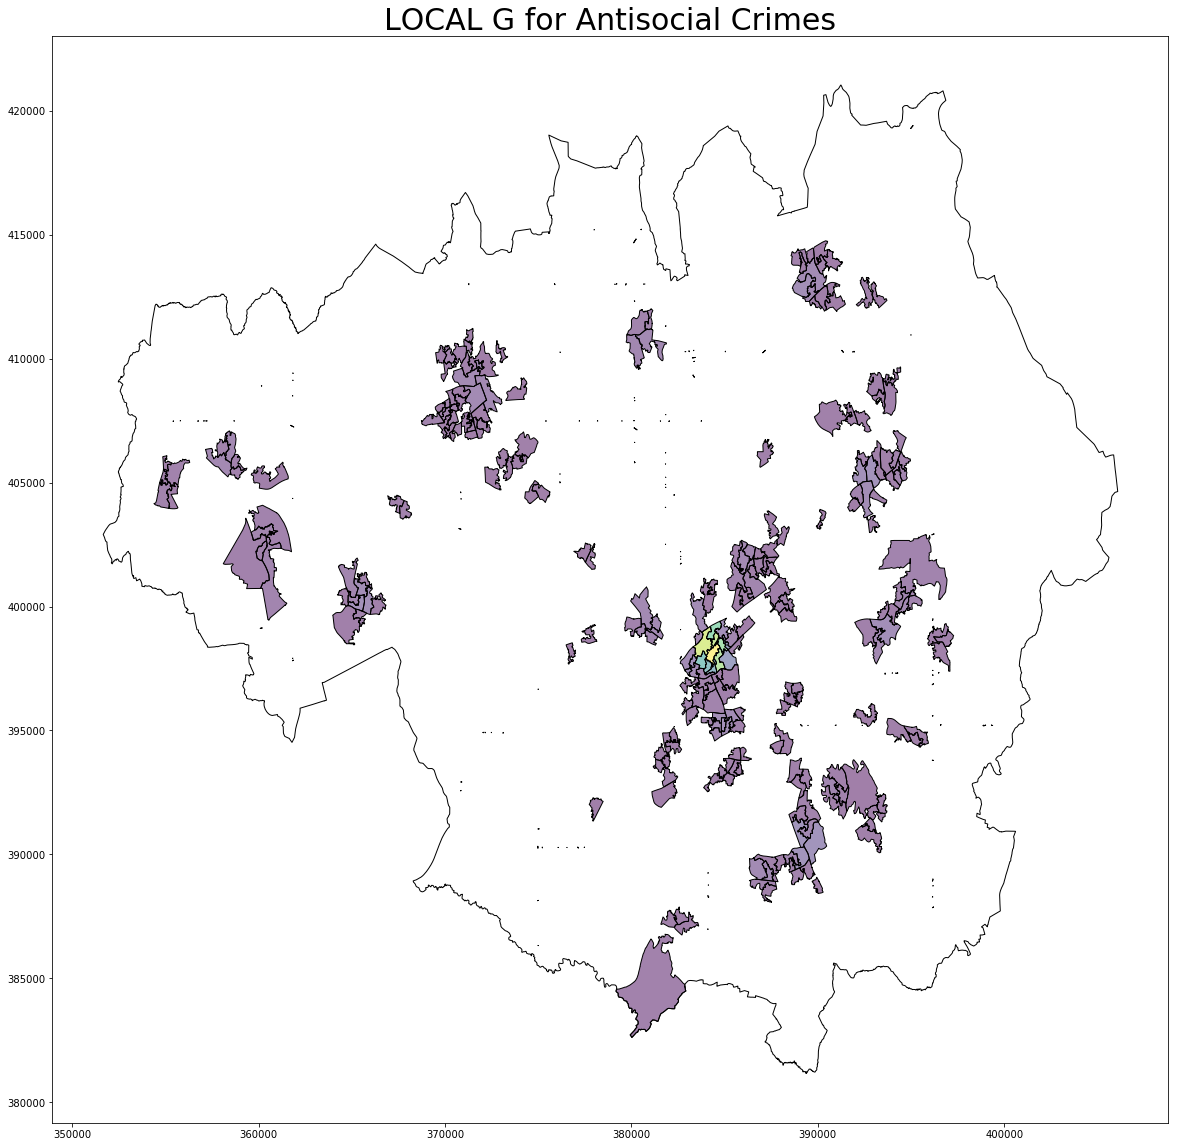

In [53]:
disolved = read_file('data/disolved.shp')
fig, ax = plt.subplots(figsize=(20,20))
ax=Antisocial117_GMax.plot(column='LMoranMax', ax=disolved.plot(ax=ax, color="white"))
plt.title('LOCAL G for Antisocial Crimes', size = 30)

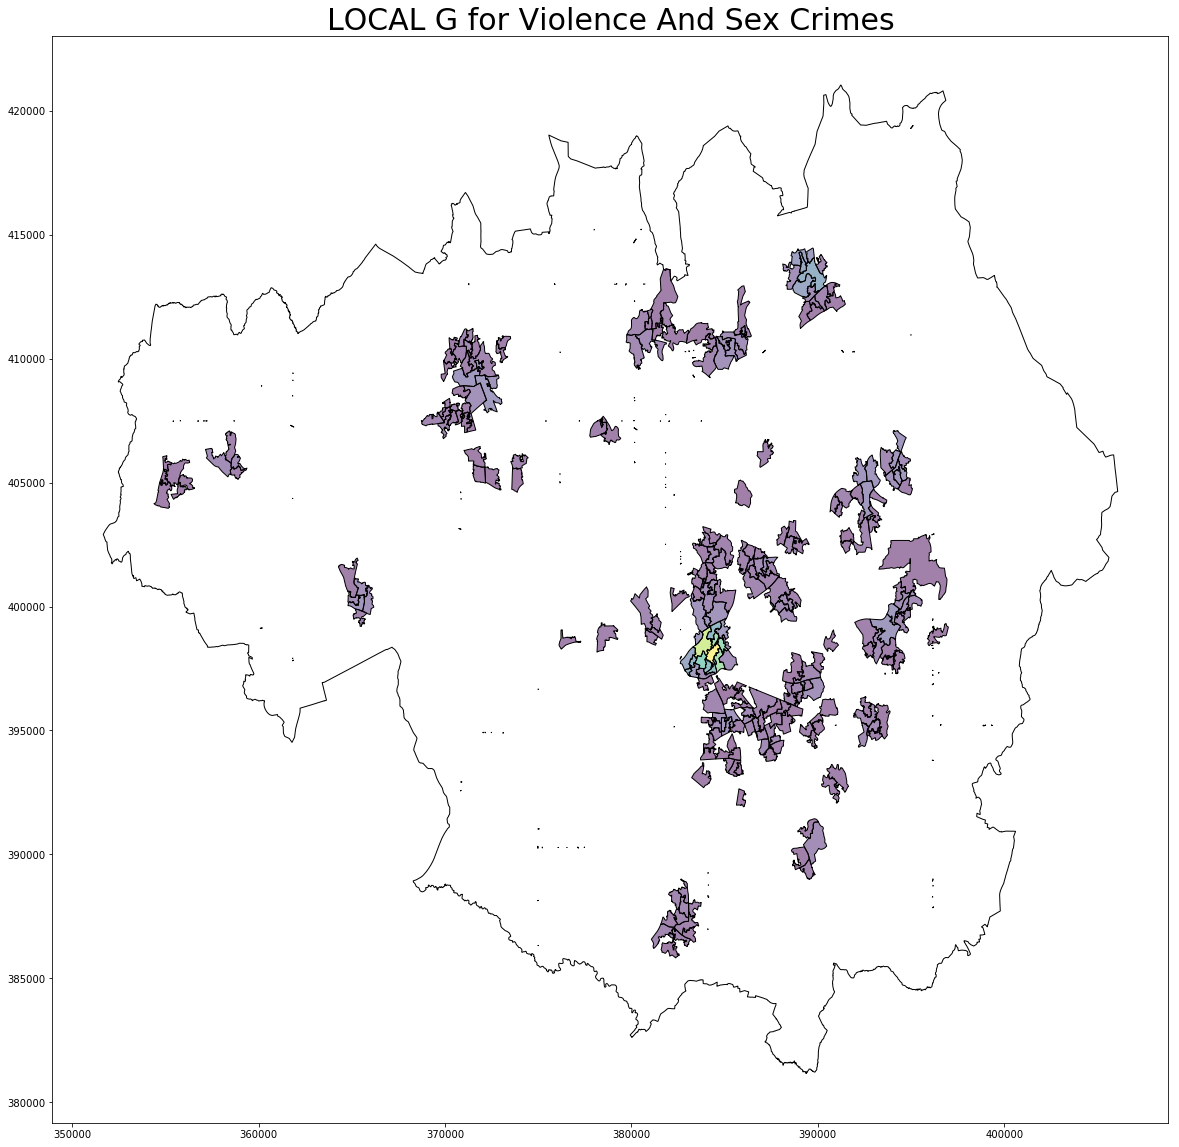

In [54]:
disolved = read_file('data/disolved.shp')
fig, ax = plt.subplots(figsize=(20,20))
ax=ViolenceAndSex117_GMax.plot(column='LMoranMax', ax=disolved.plot(ax=ax, color="white"))
plt.title('LOCAL G for Violence And Sex Crimes', size = 30)

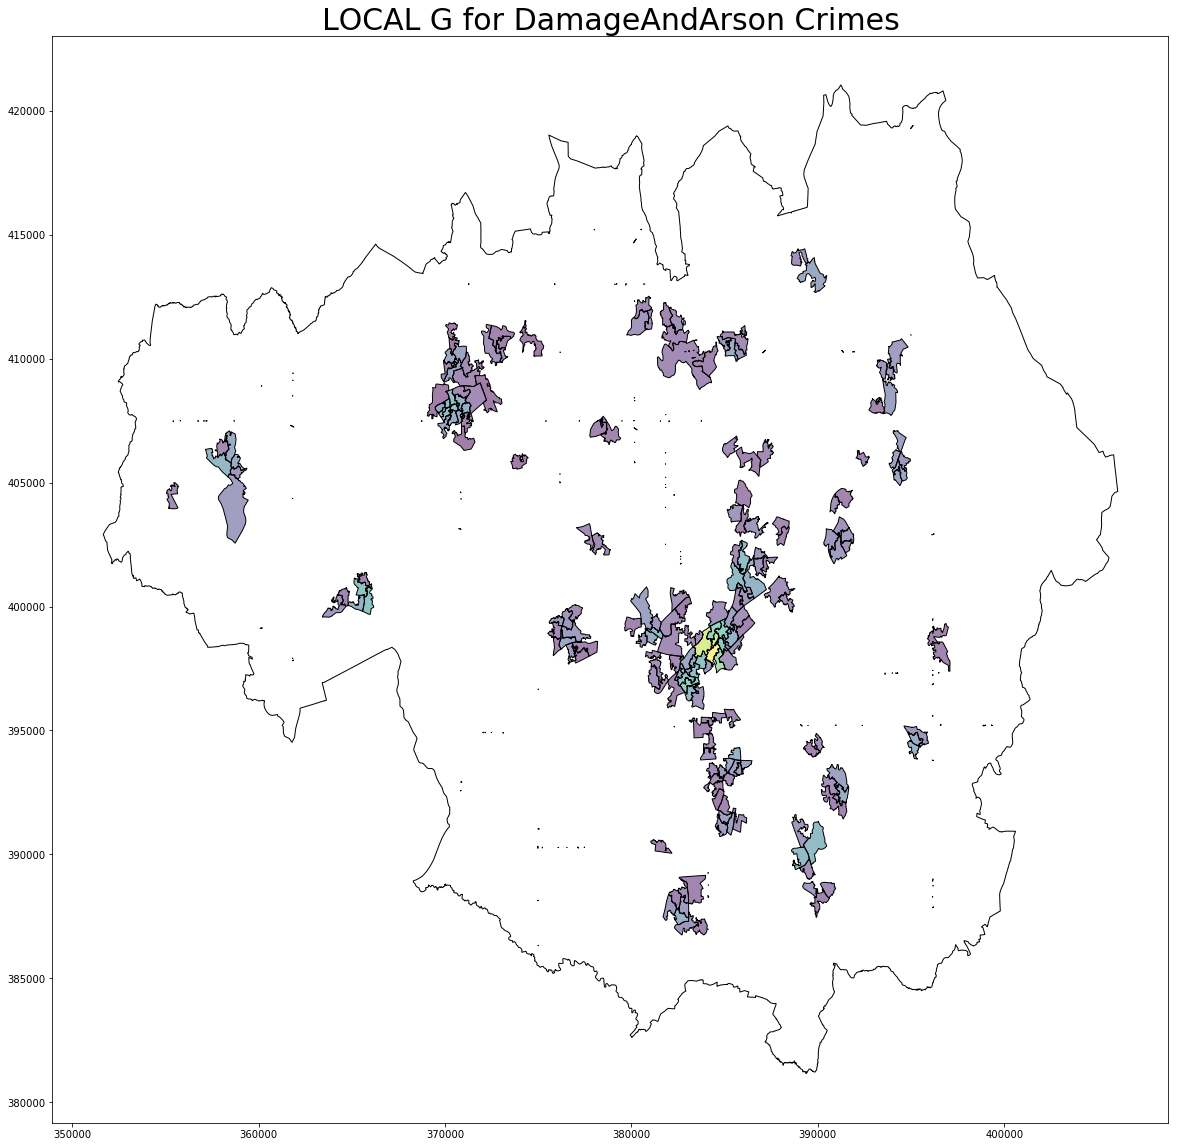

In [12]:
disolved = read_file('data/disolved.shp')
fig, ax = plt.subplots(figsize=(20,20))
ax=DamageAndArson1_GMax.plot(column='LMoranMax', ax=disolved.plot(ax=ax, color="white"))
plt.title('LOCAL G for DamageAndArson Crimes', size = 30)